In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns


from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

from sklearn.model_selection import train_test_split
from scipy import stats as stats


import warnings
warnings.filterwarnings("ignore")

import acquire as aq
import prepare as prep

## Prepare the data

In [2]:
# acquire the zillow dataset from MySQL
df = aq.get_zillow_data()

In [3]:
# Clean and split the data from predefined function
train, validate, test = prep.prep_zillow(df)

In [4]:
train.head()

,bathrooms,bedrooms,sqft,year_built,tax_amount,tax_value,fips
1443537,2.0,3.0,1205.0,1964.0,5447.96,466000.0,Ventura County
1522127,1.0,2.0,884.0,1926.0,1841.11,137911.0,Los Angeles
1808029,2.5,3.0,1734.0,1997.0,8587.12,578692.0,Orange County
1542071,3.0,4.0,2008.0,1980.0,5344.68,402623.0,Los Angeles
2032879,3.0,4.0,2270.0,1965.0,7441.18,686554.0,Orange County


## Scaling Numeric Data
- Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [5]:
# Checking shape of each of the split datasets
train.shape, validate.shape, test.shape

((1012244, 7), (433820, 7), (361516, 7))

In [6]:
X_train= train[['bedrooms', 'bathrooms', 'sqft', 'tax_value', 'tax_amount']]
X_test = test[['bedrooms', 'bathrooms', 'sqft', 'tax_value', 'tax_amount']]
y_train, y_test = train.tax_value, test.tax_value

In [7]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

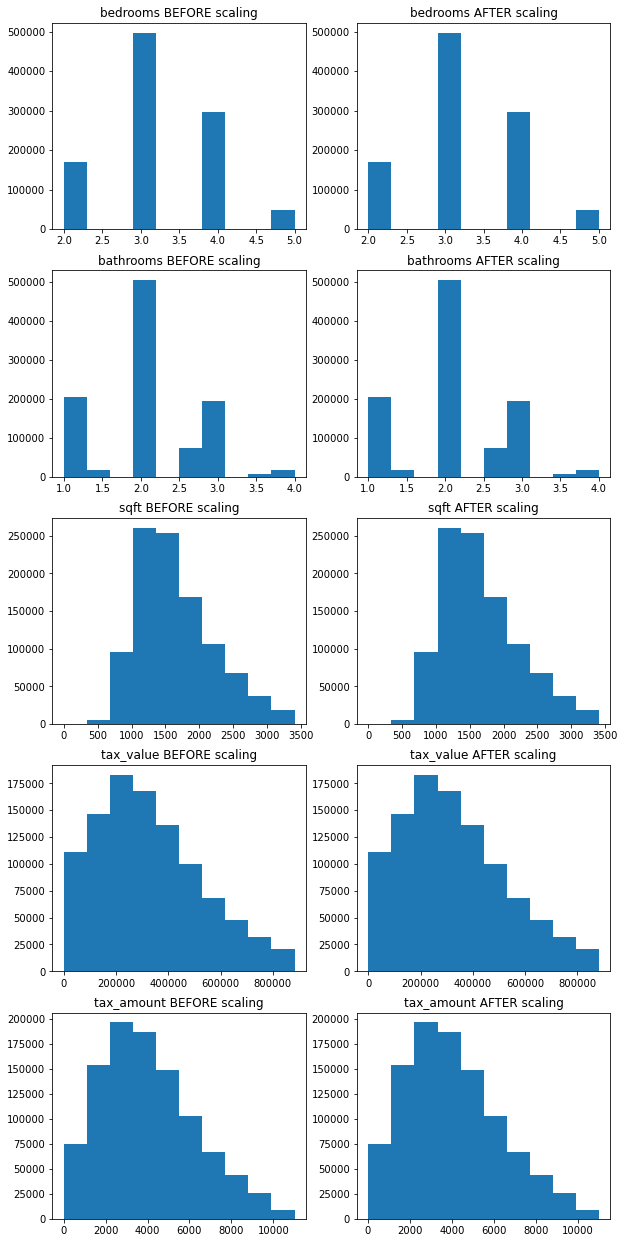

In [8]:
# set columns
# set/create subplots
fig, axs = plt.subplots(len(train.columns[0:-2]), 2, figsize=(10,22))

# create a copy of train for scaling
scaled = train.copy()


# for loop to run plots
# ax1 will represent the train dataset columns before scaling
# ax2 will represent the scaled train dataset.
for (ax1, ax2), col in zip(axs, X_train):
    ax1.hist(train[col], bins=10)
    ax1.set(title=f'{col} BEFORE scaling')
    ax2.hist(scaled[col], bins=10)
    ax2.set(title=f'{col} AFTER scaling')
plt.tight_layout

# Alternative function code: 

In [57]:
def visualize_scaler(scaler, df, target_columns, bins=50):
    fig, axs = plt.subplots(len(target_columns), 2, figsize=(16, 16))
    df_scaled = df.copy()
    df_scaled[target_columns] = scaler.fit_transform(df[target_columns])
    for (ax1, ax2), col in zip(axs, target_columns):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()
    return fig, axs

(<Figure size 1152x1152 with 10 Axes>,
 array([[<AxesSubplot:title={'center':'bathrooms before scaling'}, xlabel='bathrooms', ylabel='count'>,
         <AxesSubplot:title={'center':'bathrooms after scaling with MinMaxScaler'}, xlabel='bathrooms', ylabel='count'>],
        [<AxesSubplot:title={'center':'bedrooms before scaling'}, xlabel='bedrooms', ylabel='count'>,
         <AxesSubplot:title={'center':'bedrooms after scaling with MinMaxScaler'}, xlabel='bedrooms', ylabel='count'>],
        [<AxesSubplot:title={'center':'sqft before scaling'}, xlabel='sqft', ylabel='count'>,
         <AxesSubplot:title={'center':'sqft after scaling with MinMaxScaler'}, xlabel='sqft', ylabel='count'>],
        [<AxesSubplot:title={'center':'year_built before scaling'}, xlabel='year_built', ylabel='count'>,
         <AxesSubplot:title={'center':'year_built after scaling with MinMaxScaler'}, xlabel='year_built', ylabel='count'>],
        [<AxesSubplot:title={'center':'tax_amount before scaling'}, xlabel='t

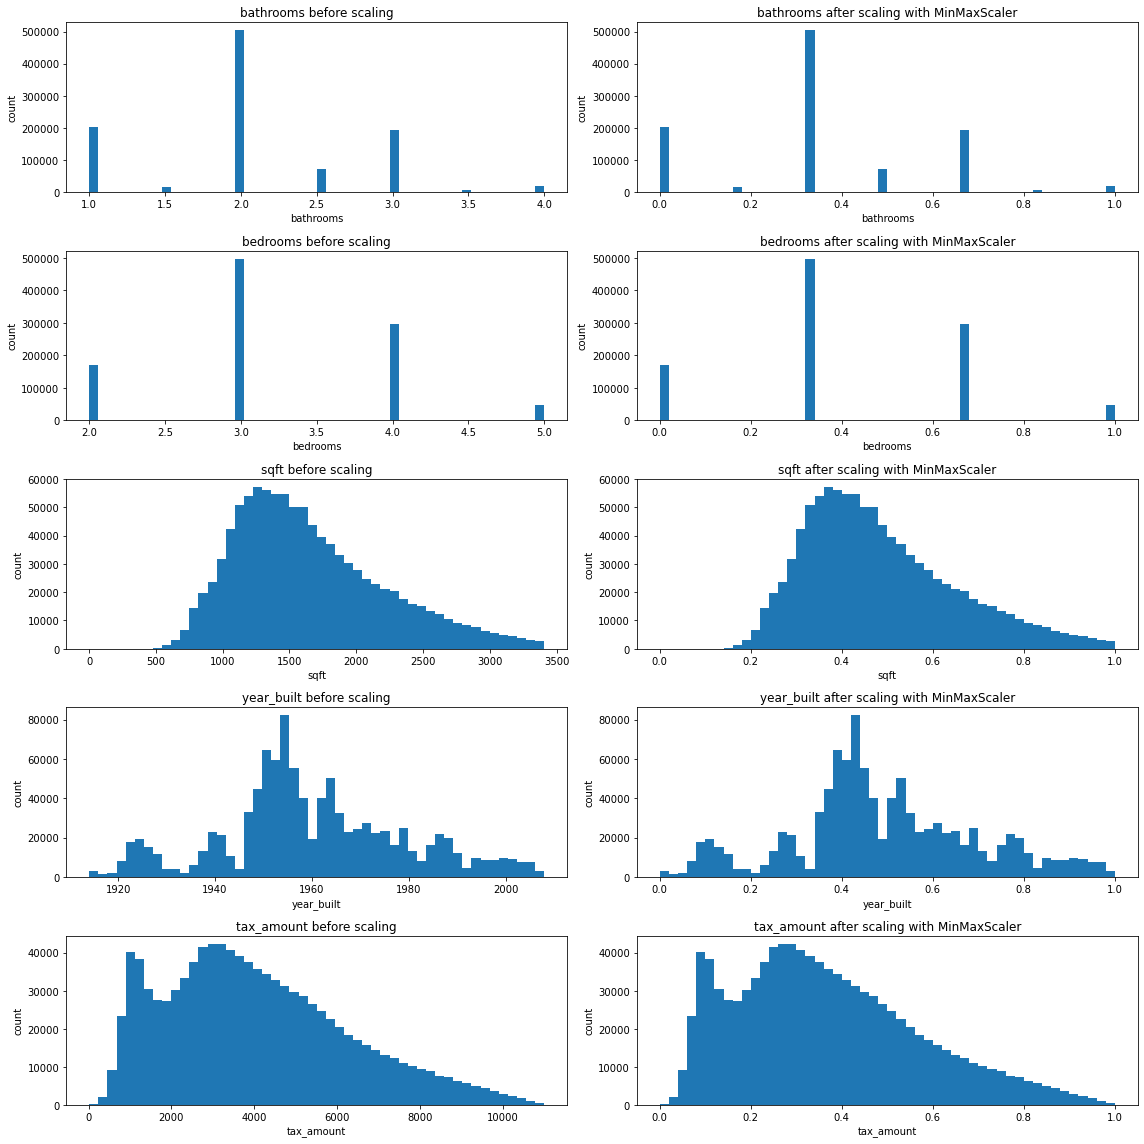

In [58]:
visualize_scaler(scaler=MinMaxScaler(), df=train, 
                 target_columns= train.columns[0:-2])

(<Figure size 1152x1152 with 10 Axes>,
 array([[<AxesSubplot:title={'center':'bathrooms before scaling'}, xlabel='bathrooms', ylabel='count'>,
         <AxesSubplot:title={'center':'bathrooms after scaling with StandardScaler'}, xlabel='bathrooms', ylabel='count'>],
        [<AxesSubplot:title={'center':'bedrooms before scaling'}, xlabel='bedrooms', ylabel='count'>,
         <AxesSubplot:title={'center':'bedrooms after scaling with StandardScaler'}, xlabel='bedrooms', ylabel='count'>],
        [<AxesSubplot:title={'center':'sqft before scaling'}, xlabel='sqft', ylabel='count'>,
         <AxesSubplot:title={'center':'sqft after scaling with StandardScaler'}, xlabel='sqft', ylabel='count'>],
        [<AxesSubplot:title={'center':'year_built before scaling'}, xlabel='year_built', ylabel='count'>,
         <AxesSubplot:title={'center':'year_built after scaling with StandardScaler'}, xlabel='year_built', ylabel='count'>],
        [<AxesSubplot:title={'center':'tax_amount before scaling'}, x

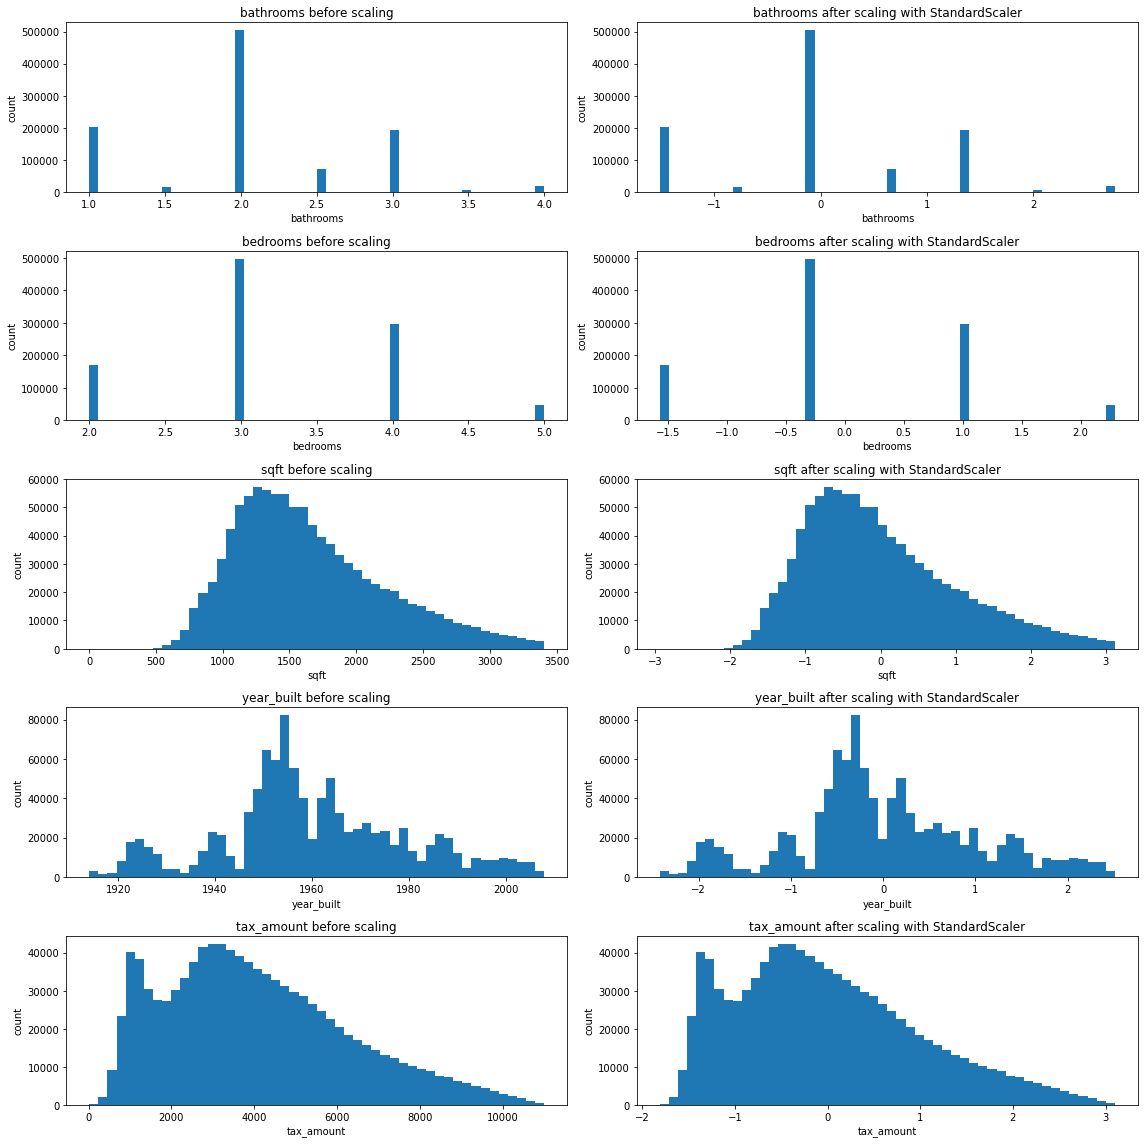

In [59]:
visualize_scaler(scaler=StandardScaler(), df=train,
                 target_columns= train.columns[0:-2])

(<Figure size 1152x1152 with 10 Axes>,
 array([[<AxesSubplot:title={'center':'bathrooms before scaling'}, xlabel='bathrooms', ylabel='count'>,
         <AxesSubplot:title={'center':'bathrooms after scaling with RobustScaler'}, xlabel='bathrooms', ylabel='count'>],
        [<AxesSubplot:title={'center':'bedrooms before scaling'}, xlabel='bedrooms', ylabel='count'>,
         <AxesSubplot:title={'center':'bedrooms after scaling with RobustScaler'}, xlabel='bedrooms', ylabel='count'>],
        [<AxesSubplot:title={'center':'sqft before scaling'}, xlabel='sqft', ylabel='count'>,
         <AxesSubplot:title={'center':'sqft after scaling with RobustScaler'}, xlabel='sqft', ylabel='count'>],
        [<AxesSubplot:title={'center':'year_built before scaling'}, xlabel='year_built', ylabel='count'>,
         <AxesSubplot:title={'center':'year_built after scaling with RobustScaler'}, xlabel='year_built', ylabel='count'>],
        [<AxesSubplot:title={'center':'tax_amount before scaling'}, xlabel='t

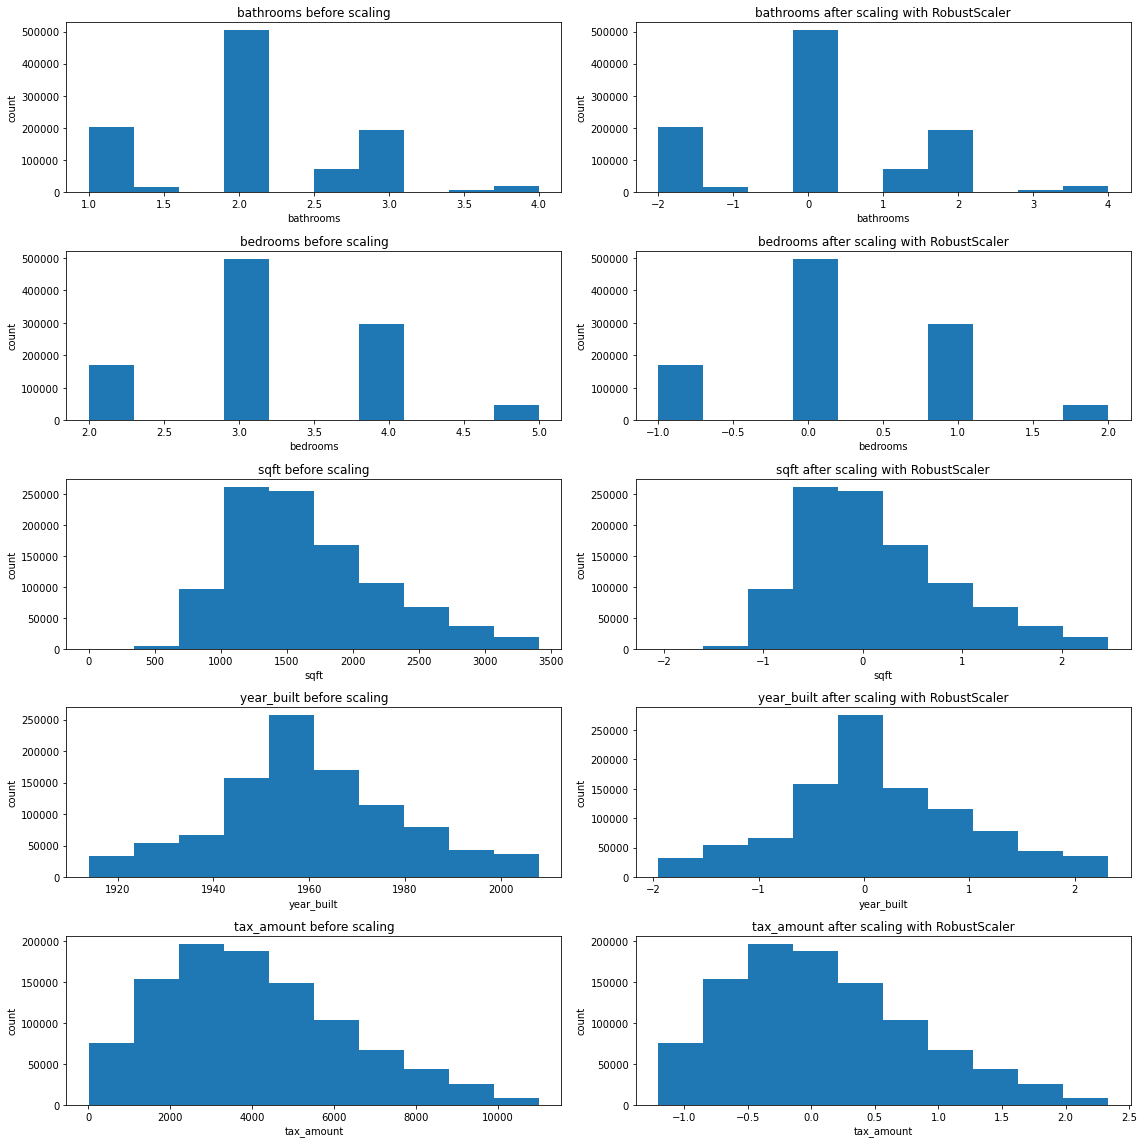

In [60]:
visualize_scaler(scaler=RobustScaler(), df=train, 
                 target_columns= train.columns[0:-2], bins=10)

## Using .inverse_transform
- Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?


### .inverse_transform : 

- Undo the scaling of X according to feature_range.

#### Parameters
- X : array-like of shape (n_samples, n_features)
- Input data that will be transformed. It cannot be sparse.

#### Returns
- Xt : ndarray of shape (n_samples, n_features)
- Transformed data.

In [61]:
columns = ['bedrooms', 'bathrooms', 'sqft', 'tax_value', 'tax_amount']

In [62]:
train.shape

(1012244, 7)

In [63]:
# construct the scaler types
minmax = MinMaxScaler()
robust = RobustScaler()
standard = StandardScaler()

# fit scalers into the train dataset
minmax.fit(train[columns])
robust.fit(train[columns])
standard.fit(train[columns])

StandardScaler()

In [64]:
# scale the train dataset
minmax_scaled = minmax.transform(train[columns])
robust_scaled = robust.transform(train[columns])
standard_scaled = standard.transform(train[columns])

### Transform the data

In [65]:
(minmax.inverse_transform(minmax_scaled) == train[columns]).all()

bedrooms       True
bathrooms     False
sqft          False
tax_value     False
tax_amount    False
dtype: bool

In [66]:
(robust.inverse_transform(robust_scaled) == train[columns]).all()

bedrooms       True
bathrooms      True
sqft          False
tax_value     False
tax_amount    False
dtype: bool

In [67]:
(standard.inverse_transform(standard_scaled) == train[columns]).all()

bedrooms       True
bathrooms      True
sqft          False
tax_value     False
tax_amount    False
dtype: bool

## Quantile Transformer: 
- This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

In [68]:
scaler2 = QuantileTransformer(output_distribution='normal')
X_train_scaled_2 = scaler2.fit_transform(X_train)
X_test_scaled_2 = scaler2.transform(X_test)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

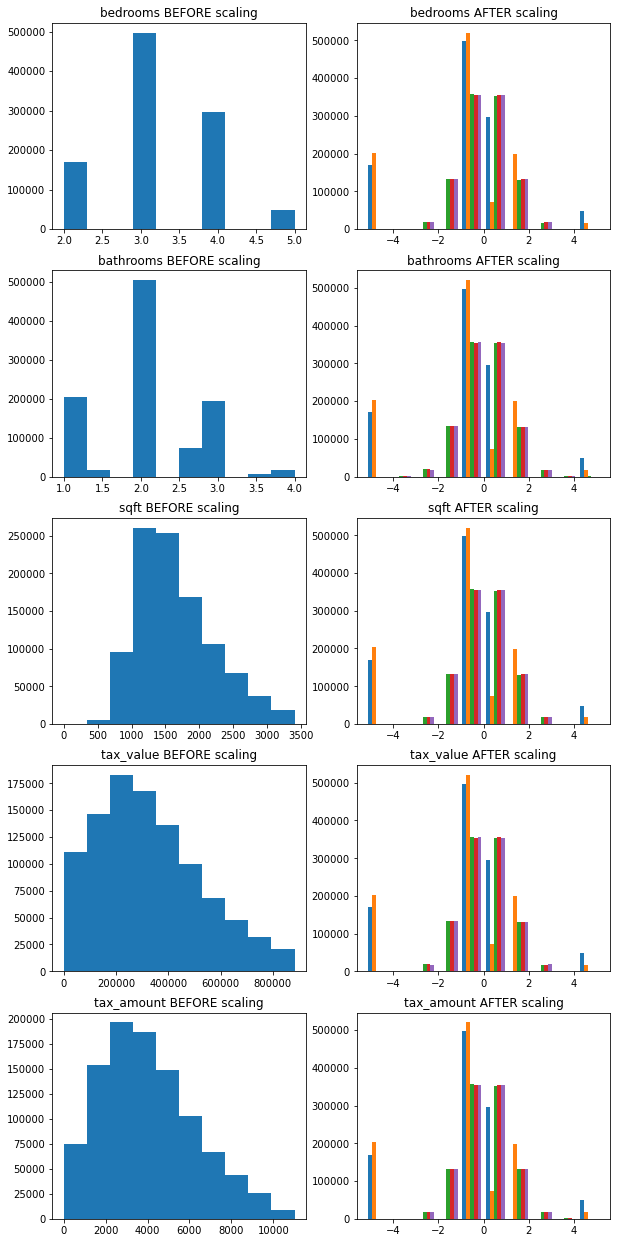

In [69]:
## set/create subplots
fig, axs = plt.subplots(len(train.columns[0:-2]), 2, figsize=(10,22))

# create a copy of train for scaling
scaled = X_train_scaled_2

# for loop to run plots
# ax1 will represent the train dataset columns before scaling
# ax2 will represent the scaled train dataset.
for (ax1, ax2), col in zip(axs, X_train):
    ax1.hist(train[col], bins=10)
    ax1.set(title=f'{col} BEFORE scaling')
    ax2.hist(scaled, bins=10)
    ax2.set(title=f'{col} AFTER scaling')
plt.tight_layout

# Alternative :

(<Figure size 1152x1152 with 10 Axes>,
 array([[<AxesSubplot:title={'center':'bathrooms before scaling'}, xlabel='bathrooms', ylabel='count'>,
         <AxesSubplot:title={'center':'bathrooms after scaling with QuantileTransformer'}, xlabel='bathrooms', ylabel='count'>],
        [<AxesSubplot:title={'center':'bedrooms before scaling'}, xlabel='bedrooms', ylabel='count'>,
         <AxesSubplot:title={'center':'bedrooms after scaling with QuantileTransformer'}, xlabel='bedrooms', ylabel='count'>],
        [<AxesSubplot:title={'center':'sqft before scaling'}, xlabel='sqft', ylabel='count'>,
         <AxesSubplot:title={'center':'sqft after scaling with QuantileTransformer'}, xlabel='sqft', ylabel='count'>],
        [<AxesSubplot:title={'center':'year_built before scaling'}, xlabel='year_built', ylabel='count'>,
         <AxesSubplot:title={'center':'year_built after scaling with QuantileTransformer'}, xlabel='year_built', ylabel='count'>],
        [<AxesSubplot:title={'center':'tax_amount

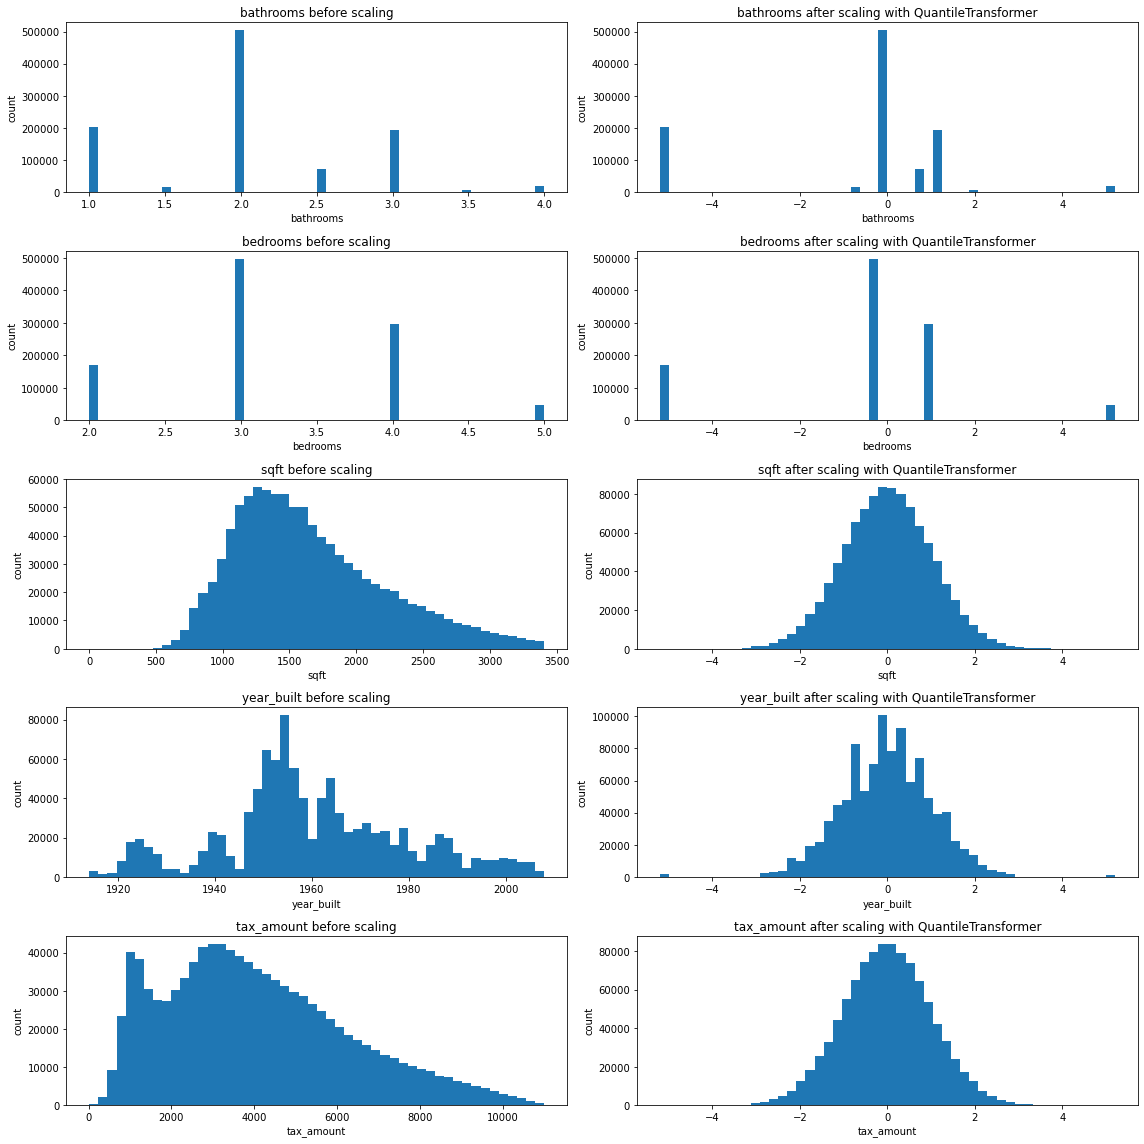

In [70]:
visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), 
                 df=train, target_columns= train.columns[0:-2], bins=50)

(<Figure size 1152x1152 with 10 Axes>,
 array([[<AxesSubplot:title={'center':'bathrooms before scaling'}, xlabel='bathrooms', ylabel='count'>,
         <AxesSubplot:title={'center':'bathrooms after scaling with QuantileTransformer'}, xlabel='bathrooms', ylabel='count'>],
        [<AxesSubplot:title={'center':'bedrooms before scaling'}, xlabel='bedrooms', ylabel='count'>,
         <AxesSubplot:title={'center':'bedrooms after scaling with QuantileTransformer'}, xlabel='bedrooms', ylabel='count'>],
        [<AxesSubplot:title={'center':'sqft before scaling'}, xlabel='sqft', ylabel='count'>,
         <AxesSubplot:title={'center':'sqft after scaling with QuantileTransformer'}, xlabel='sqft', ylabel='count'>],
        [<AxesSubplot:title={'center':'year_built before scaling'}, xlabel='year_built', ylabel='count'>,
         <AxesSubplot:title={'center':'year_built after scaling with QuantileTransformer'}, xlabel='year_built', ylabel='count'>],
        [<AxesSubplot:title={'center':'tax_amount

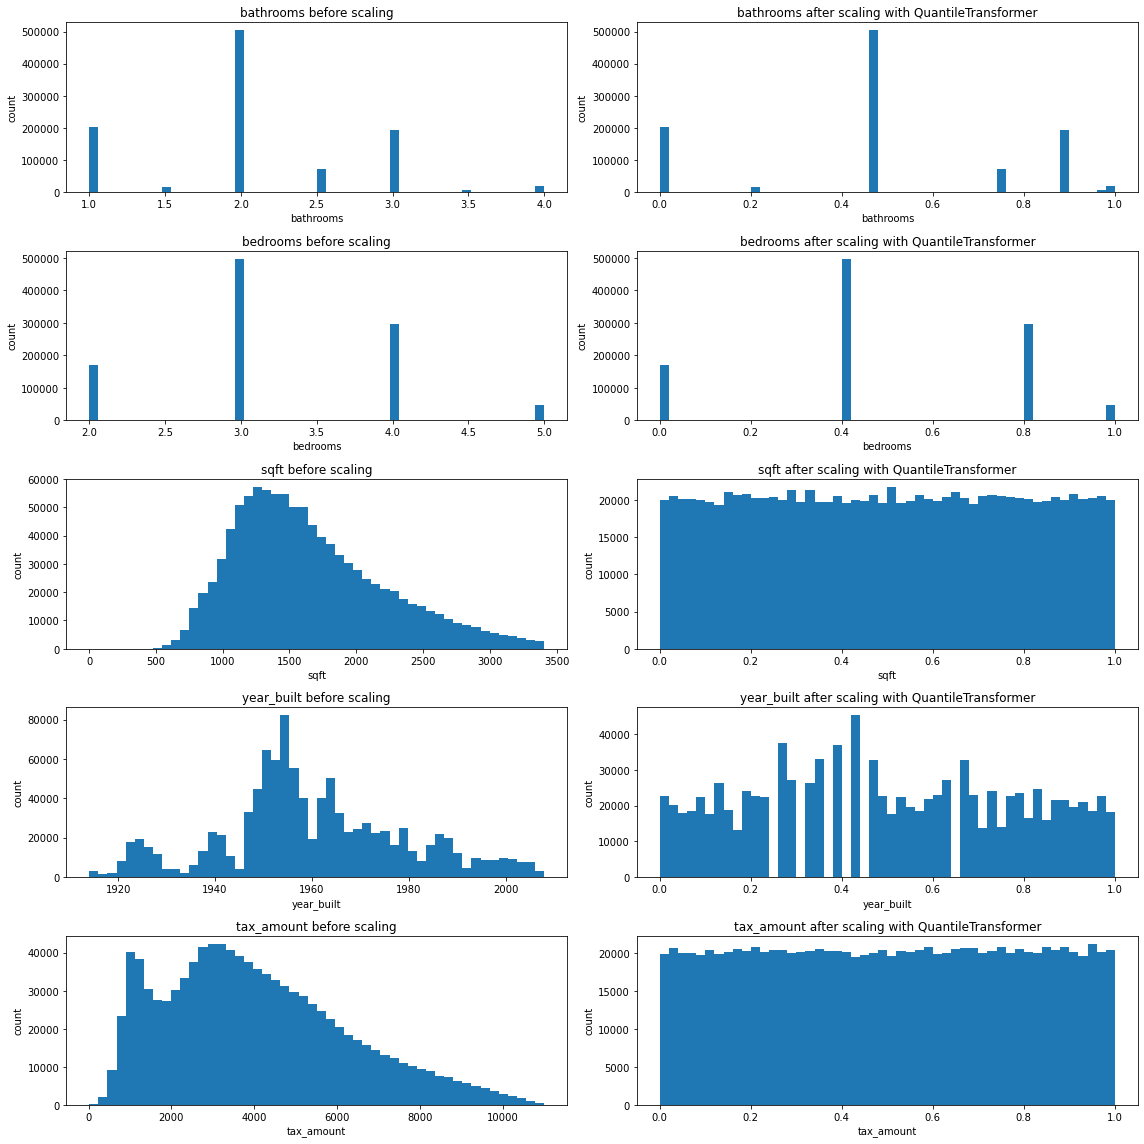

In [71]:
visualize_scaler(scaler=QuantileTransformer(), 
                 df=train, target_columns= train.columns[0:-2], bins=50)

### Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [73]:
def scale_data(train, validate, test, return_scaler=False):
    '''
    Scales the 3 data splits.
    
    takes in the train, validate, and test data splits and returns their scaled counterparts.
    
    If return_scaler is true, the scaler object will be returned as well.
    '''
    columns_to_scale = ['bedrooms', 'bathrooms', 'tax_value', 'tax_amount', 'sqft']
    
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    scaler = MinMaxScaler()
    scaler.fit(train[columns_to_scale])
    
    train_scaled[columns_to_scale] = scaler.transform(train[columns_to_scale])
    validate_scaled[columns_to_scale] = scaler.transform(validate[columns_to_scale])
    test_scaled[columns_to_scale] = scaler.transform(test[columns_to_scale])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [74]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test)

In [75]:
train.head()

,bathrooms,bedrooms,sqft,year_built,tax_amount,tax_value,fips
1443537,2.0,3.0,1205.0,1964.0,5447.96,466000.0,Ventura County
1522127,1.0,2.0,884.0,1926.0,1841.11,137911.0,Los Angeles
1808029,2.5,3.0,1734.0,1997.0,8587.12,578692.0,Orange County
1542071,3.0,4.0,2008.0,1980.0,5344.68,402623.0,Los Angeles
2032879,3.0,4.0,2270.0,1965.0,7441.18,686554.0,Orange County


In [76]:
train_scaled.head()

,bathrooms,bedrooms,sqft,year_built,tax_amount,tax_value,fips
1443537,0.333333,0.333333,0.353390,1964.0,0.494142,0.527926,Ventura County
1522127,0.000000,0.000000,0.259172,1926.0,0.166000,0.156220,Los Angeles
1808029,0.500000,0.333333,0.508659,1997.0,0.779735,0.655599,Orange County
1542071,0.666667,0.666667,0.589081,1980.0,0.484746,0.456123,Los Angeles
2032879,0.666667,0.666667,0.665982,1965.0,0.675480,0.777801,Orange County
